In [1]:
import pandas as pd

#Read the game history file
df = pd.read_excel('game_history.xlsx', usecols='B:E')
df

,Start Date/Time,End Date/Time,Completion time (secs),Scores
0,2023-01-10 05:12:10.013,2023-01-10 05:12:18.929,8,13
1,2023-01-10 05:12:21.584,2023-01-10 05:12:29.035,7,11
2,2023-01-10 05:12:31.077,2023-01-10 05:12:35.494,4,6
3,2023-01-10 05:12:37.372,2023-01-10 05:12:43.201,5,7
4,2023-01-10 05:12:45.151,2023-01-10 05:12:50.066,4,6
5,2023-01-10 05:12:53.189,2023-01-10 05:13:03.353,10,13
6,2023-01-10 05:13:05.706,2023-01-10 05:13:12.530,6,10
7,2023-01-10 05:13:24.699,2023-01-10 05:13:30.826,6,8
8,2023-01-10 05:13:32.519,2023-01-10 05:13:42.891,10,13
9,2023-01-10 05:13:45.297,2023-01-10 05:13:53.958,8,13


In [11]:
from datetime import datetime

# import medialib
from medialib import *
initialize() # first instruction of the program

# The list representing the background of each row
background=[['X','X','X','X','X','X','X','X','X','X','X','X','X','X','X','X','X','X'],
            ['X','_','F','F','_','_','M','_','_','F','F','_','F','_','_','_','_','X'],
            ['X','F','_','_','M','_','M','F','_','_','F','_','_','M','_','E','F','X'],
            ['X','_','_','F','_','_','_','_','_','F','M','_','F','_','F','_','_','X'],
            ['X','X','X','X','X','X','X','X','X','X','X','X','X','X','X','X','X','X']] 

clear(200,200,200) ## First background

# for loop: indicate variable to draw the text and picture
def draw_bg(str_bg,x_pos,y_pos):
    text('Maze game',300,100,20)
    text('You are a lost cat, and have to find your way back home...',10,500,16)
    text('reach the door to leave this level and get closer to home!',10,520,16)
    text('To play: press a and d keys to move left and right',10,540,16)
    text('         press w and s keys to move upwards and downwards',10,560,16)
    text('         press q to quit the game',10,580,16)
    text("Point: {}".format(point),10,150,16)
    for i in str_bg:  #for loop: move picture toward y-axis
        for j in i:  #for loop: indicate variable to draw picture and move picture toward x-axis
            bg = j
            if bg=="X": #brick picture
                draw('MazeGame_imgs\X.png',x_pos,y_pos)
            elif bg=="_": #road picture
                draw('MazeGame_imgs\_.png',x_pos,y_pos)
            elif bg=="F": #food Picture
                draw('MazeGame_imgs\F.png',x_pos,y_pos)
            elif bg=="M": #monster picture
                draw('MazeGame_imgs\M.png',x_pos,y_pos)
            elif bg=="E": #exit picture
                draw('MazeGame_imgs\E.png',x_pos,y_pos)
            x_pos += width #move picture toward x-axis
        y_pos += width #move picture toward y-axis
        x_pos = x0 #set the x_pos to be at the starting point

# Set starting point of background - the first image is at (10,200)
x0=10
y0=200 
width = 30

# the initial location of the avatar (index,position)
cat_xpos=1
cat_ypos=1
xpos=(cat_xpos*width)+x0
ypos=(cat_ypos*width)+y0

# game state
game_running = True
point = 0
    
# Set the game startime
start_time = datetime.now()

while game_running:

    ###################            game initial state, draw the background and the avatar            ###################
    
    draw_bg(background,x0,y0)
    draw('MazeGame_imgs\C.png',xpos,ypos)
             
    ##########################################         Movement part         ##########################################
    
    userinput = wait_key_press()
    
    ## if the player push 'q', quit the game. 
    if userinput=="q":
        draw("MazeGame_imgs\C.png",xpos,ypos) #draw avatar
        text("Game over!!!",10,450,40)
        break  #end the loop and exit the game
        
    ## if the player push 'a',the avatar go left.
    elif userinput == "a":
        clear(200,200,200) ## clear background
        if xpos<=(x0+width): #set position that avatar can not pass through
            text("Cat cannot pass, go other ways!",10,480,16)
        else:
            cat_xpos -= 1
            xpos=(cat_xpos*width)+x0
        draw("MazeGame_imgs\C.png",xpos,ypos)
        
    ## if the player push 'd',the avatar go right.
    elif userinput == "d":
        clear(200,200,200) ## clear background
        if xpos>=(x0+(width*16)): #set position that avatar can not pass through
            text("Cat cannot pass, go other ways!",10,480,16)
        else:
            cat_xpos += 1
            xpos=(cat_xpos*width)+x0
        draw("MazeGame_imgs\C.png",xpos,ypos)

    ## if the player push 'w',the avatar go upward.
    elif userinput == "w":
        clear(200,200,200) ## clear background
        if ypos<=(y0+(width)): #set position that avatar can not pass through
            text("Cat cannot pass, go other ways!",10,480,16)
        else:
            cat_ypos -= 1
            ypos=(cat_ypos*width)+y0
        draw("MazeGame_imgs\C.png",xpos,ypos)

    ## if the player push 's',the avatar go downward.
    elif userinput == "s":
        clear(200,200,200) ## clear background
        if ypos>=(y0+(width*3)): #set position that avatar can not pass through
            text("Cat cannot pass, go other ways!",10,480,16)
        else:
            cat_ypos += 1
            ypos=(cat_ypos*width)+y0
        draw("MazeGame_imgs\C.png",xpos,ypos)

    else:
        clear(200,200,200) ## clear background
        draw("MazeGame_imgs\C.png",xpos,ypos)
        text("This is a illegal input!!!",10,480,16)

        
    #######################################           Gameplay: Eaten food          #######################################

    if background[cat_ypos][cat_xpos]=="F":   #If position of the cat meet 'F', the background will change to '_'
        point += 1
        background[cat_ypos][cat_xpos]="_"

    #####################################        Gameplay: Avatar meet monster       #####################################
        
    elif background[cat_ypos][cat_xpos]=="M":   #If position of the cat meet 'M', the game will end
        text("Game over!!!",10,450,40)
        break  #end the loop and exit the game
    
    #####################################             Gameplay: Win game             #####################################

    elif background[cat_ypos][cat_xpos]=="E":   #If position of the cat meet 'E', the game will win and end
        draw_bg(background,x0,y0)
        draw("MazeGame_imgs\you_win.png",100,50)
        end_time = datetime.now()  #End the time
        time_completion = (end_time - start_time).seconds #Find the completion time
        df = df.append({'Start Date/Time' : start_time, 'End Date/Time' : end_time,
                        'Completion time (secs)' : time_completion,
                        'Scores' : point}, ignore_index=True) #Add new data record to dataframe
        break  #end the loop and exit the game

all_done()

    
print(df)  #checking the data
df.to_excel("game_history.xlsx")  # export the dataframe into excel file

           Start Date/Time           End Date/Time  Completion time (secs)  \
0  2023-01-10 05:12:10.013 2023-01-10 05:12:18.929                       8   
1  2023-01-10 05:12:21.584 2023-01-10 05:12:29.035                       7   
2  2023-01-10 05:12:31.077 2023-01-10 05:12:35.494                       4   
3  2023-01-10 05:12:37.372 2023-01-10 05:12:43.201                       5   
4  2023-01-10 05:12:45.151 2023-01-10 05:12:50.066                       4   
5  2023-01-10 05:12:53.189 2023-01-10 05:13:03.353                      10   
6  2023-01-10 05:13:05.706 2023-01-10 05:13:12.530                       6   
7  2023-01-10 05:13:24.699 2023-01-10 05:13:30.826                       6   
8  2023-01-10 05:13:32.519 2023-01-10 05:13:42.891                      10   
9  2023-01-10 05:13:45.297 2023-01-10 05:13:53.958                       8   
10 2023-01-10 05:13:58.207 2023-01-10 05:14:05.062                       6   
11 2023-01-10 05:14:12.835 2023-01-10 05:14:23.134              

# Visualization

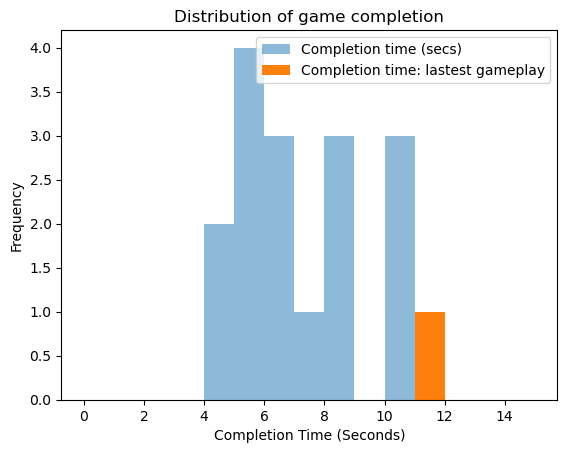

In [2]:
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Histogram: Distribution of game completion

x = df['Completion time (secs)']
y = df['Completion time (secs)'].values[-1:]

bins = range(0,16)

plt.hist(x, bins, alpha=0.5, label='Completion time (secs)')
plt.hist(y, bins, alpha=1, label='Completion time: lastest gameplay')
plt.legend(loc='upper right')
plt.xlabel('Completion Time (Seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of game completion')
plt.show()

Text(0.5, 1.0, 'Game Completion Times vs Scores')

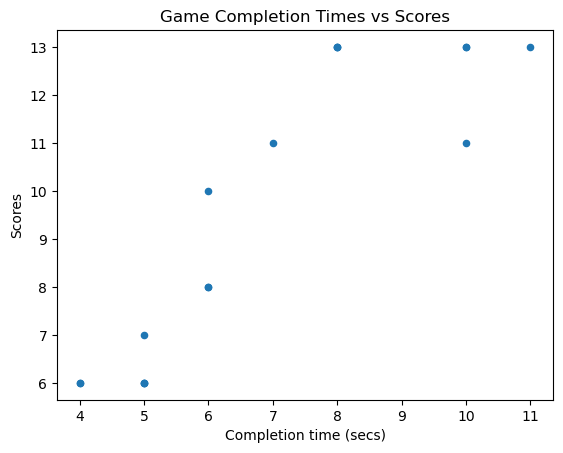

In [3]:
# Scatterplot: Game Completion Times vs Scores

df.plot.scatter(x='Completion time (secs)', y='Scores')
plt.title('Game Completion Times vs Scores')

Text(0.5, 1.0, 'Scores timeline')

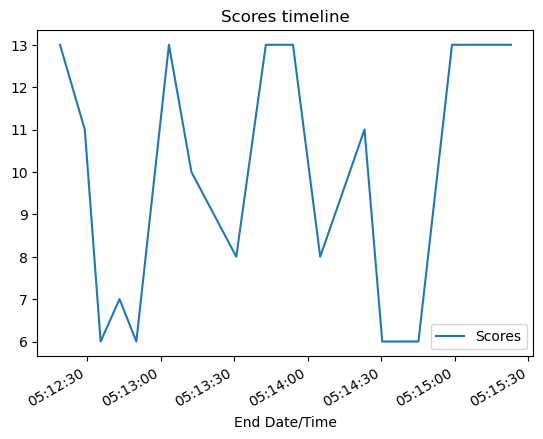

In [4]:
# Line graph: Trend line for game scores

df.plot.line(x='End Date/Time', y='Scores')
plt.title('Scores timeline')

# New background from imported dataset

Dataset retrieved from https://archive.ics.uci.edu/ml/datasets/Wine. It is the dataset about the origin of wine classified by the chemical analysis. The column ash (C2) and Nonflavanoid phenols (C7) were used to indicate the coordinate of new monster. Also, Flavanoids column (C6) and hue column (C10) as the coordinate of new food background.

In [5]:
#Import dataset
wine =  pd.read_csv('wine.data', names=['T','C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13'])
wine

,T,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
#Select 5 rows for monster and set the values to match with background coordinate
import numpy as np
np.random.seed(17)
df_monster = wine.sample(n=5)

df_monster["monster_x"] = np.round(df_monster["C7"]*11/df_monster["C7"].max())
df_monster["monster_y"] = np.round(df_monster["C2"])


df_monster[["monster_x","monster_y"]]

,monster_x,monster_y
128,9.0,2.0
64,6.0,1.0
85,7.0,1.0
51,11.0,2.0
153,3.0,3.0


In [7]:
#Select 11 rows for fish and set the values to match with background coordinate

np.random.seed(54)
df_food = wine.sample(n=11)

df_food["food_x"] = np.round(df_food["C10"]*1.7)
df_food["food_y"] = np.round(df_food["C6"]*0.9)


df_food[["food_x","food_y"]]

,food_x,food_y
11,8.0,2.0
4,7.0,3.0
123,4.0,2.0
143,7.0,2.0
108,5.0,2.0
31,12.0,3.0
73,6.0,3.0
90,4.0,1.0
157,13.0,2.0
164,16.0,1.0


In [10]:
#Set background without foods and monsters
bg_q9=[['X','X','X','X','X','X','X','X','X','X','X','X','X','X','X','X','X','X'],
        ['X','_','_','_','_','_','_','_','_','_','_','_','_','_','_','_','_','X'],
        ['X','_','_','_','_','_','_','_','_','_','_','_','_','_','_','E','_','X'],
        ['X','_','_','_','_','_','_','_','_','_','_','_','_','_','_','_','_','X'],
        ['X','X','X','X','X','X','X','X','X','X','X','X','X','X','X','X','X','X']] 

#Create list of x position of monsters
x_mons = []
for i in df_monster.monster_x:
    x_mons.append(i)

#Create list of y position of monsters
y_mons = []
for i in df_monster.monster_y:
    y_mons.append(i)

#Create for loop to replace the string M into created index
for i in range(len(y_mons)):
    bg_q9[int(y_mons[i])][int(x_mons[i])]='M'

#Create list of x position of foods
x_food = []
for i in df_food.food_x:
    x_food.append(i)

#Create list of y position of foods
y_food = []
for i in df_food.food_y:
    y_food.append(i)

#Create for loop to replace the string F into created index
for i in range(len(y_food)):
    bg_q9[int(y_food[i])][int(x_food[i])]='F'
    
# Draw background to test our new background works or not

from medialib import *

initialize()

clear(200,200,200)
x0=10
y0=200 
width = 30

def draw_bg(str_bg,x_pos,y_pos):
    text('Test New Background',280,100,20)
    text('Click left to exit the window',10,500,16)
    for i in str_bg:  #for loop: move picture toward y-axis
        for j in i:  #for loop: indicate variable to draw picture and move picture toward x-axis
            bg = j
            if bg=="X": #brick picture
                draw('MazeGame_imgs\X.png',x_pos,y_pos)
            elif bg=="_": #road picture
                draw('MazeGame_imgs\_.png',x_pos,y_pos)
            elif bg=="F": #food Picture
                draw('MazeGame_imgs\F.png',x_pos,y_pos)
            elif bg=="M": #monster picture
                draw('MazeGame_imgs\M.png',x_pos,y_pos)
            elif bg=="E": #exit picture
                draw('MazeGame_imgs\E.png',x_pos,y_pos)
            x_pos += width #move picture toward x-axis
        y_pos += width #move picture toward y-axis
        x_pos = x0 #set the x_pos to be at the starting point
        
draw_bg(bg_q9,10,200)

wait_mouse_leftclick()
all_done()
